Credit Score Classification

In [208]:
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
import os
from pathlib import Path
import pandas as pd
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import MultiLabelBinarizer


In [209]:
df = pd.read_csv(r'C:\Users\Juan\Desktop\Data Science\Projects\Project_3_CreditCard\Data\train_data.csv')


C:\Users\Juan\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [210]:
df.shape

(100000, 28)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Change_credit_limit , num_of_delayed_payment, type_of_loan, monthly_inhand_salary nad name seems to have missing values

In [212]:
df.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [213]:
#ID, costumer id , month, name, ssn, and ocupation can be drop

### EDA and FEATURE ENGINEERING

<AxesSubplot:xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

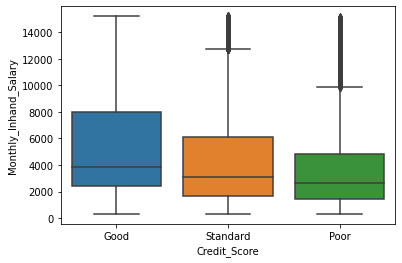

In [214]:
sns.boxplot( y = df.Monthly_Inhand_Salary, x = df.Credit_Score )

array([[<AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>]],
      dtype=object)

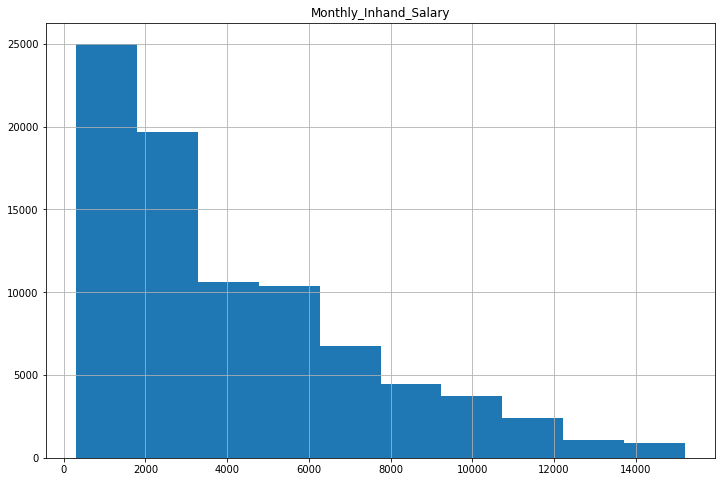

In [215]:
df.hist('Monthly_Inhand_Salary', bins=10, figsize=(12,8))

In [216]:
#removing characters from features and converting into float
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.strip('_')
df['Monthly_Balance'] = df['Monthly_Balance'].str.strip('_')
df['Monthly_Balance'] = df['Monthly_Balance'].str.strip('-')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.strip('_')
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.strip('_')

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('float')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype('float')
df['Monthly_Balance'] = df['Monthly_Balance'].astype('float')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype('float')
df['Annual_Income'] = df['Annual_Income'].str.strip('_')
df['Annual_Income'] = df['Annual_Income'].astype('float')

df['Num_of_Loan'] = df['Num_of_Loan'].str.strip('_')
df['Num_of_Loan'] = df['Num_of_Loan'].astype('float')

array([[<AxesSubplot:title={'center':'Outstanding_Debt'}>]], dtype=object)

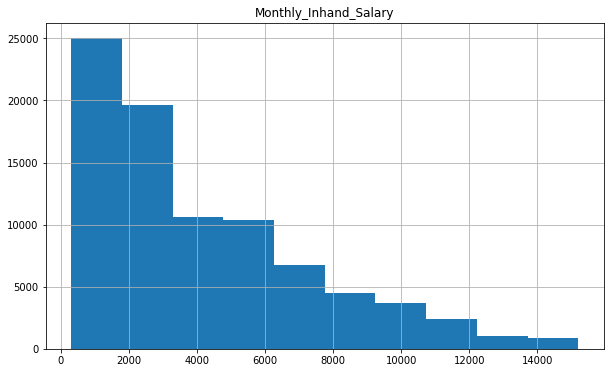

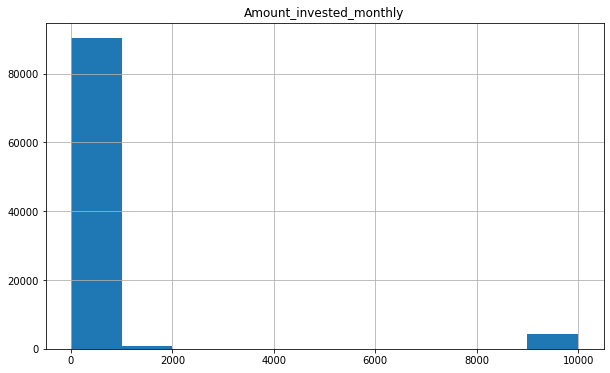

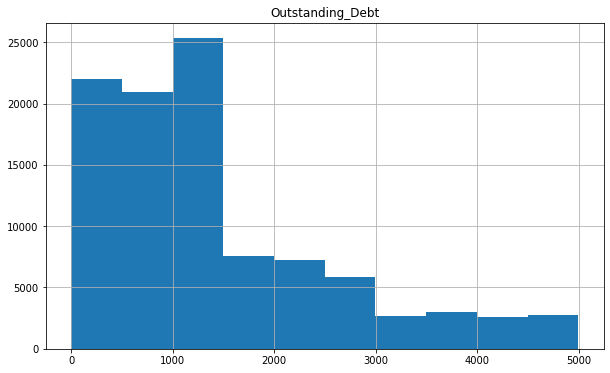

In [217]:
df.hist('Monthly_Inhand_Salary', bins=10, figsize=(10,6))

df.hist('Amount_invested_monthly', bins=10, figsize=(10,6))
df.hist('Outstanding_Debt', bins=10, figsize=(10,6))



In [218]:
df.Payment_of_Min_Amount.value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

<AxesSubplot:xlabel='Credit_Score', ylabel='Outstanding_Debt'>

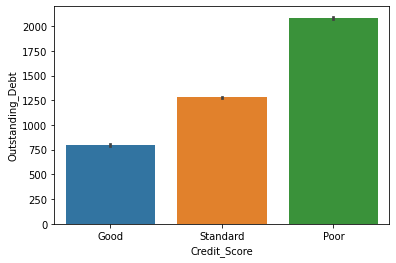

In [219]:
sns.barplot(x='Credit_Score', y="Outstanding_Debt", data=df)


<AxesSubplot:xlabel='Credit_Score', ylabel='Amount_invested_monthly'>

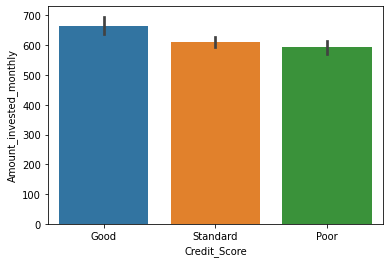

In [240]:
#Feature Not suitable
sns.barplot(x='Credit_Score', y="Amount_invested_monthly", data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Credit_Utilization_Ratio'>

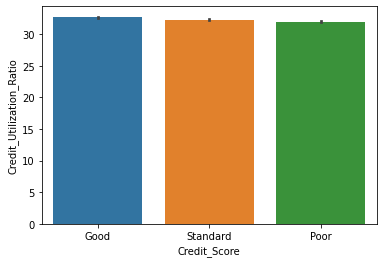

In [221]:
sns.barplot(x='Credit_Score', y="Credit_Utilization_Ratio", data=df)


In [222]:
df.Occupation.value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [223]:
#Droping columns
df.drop(['ID','Customer_ID', 'Month' , 'Name','SSN', 'Changed_Credit_Limit','Credit_Utilization_Ratio'],axis=1, inplace=True)



In [224]:
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,4.0,_,809.98,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,4.0,Good,809.98,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,4.0,Good,809.98,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,23,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,4.0,Good,809.98,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,4.0,Good,809.98,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",23,...,3.0,_,502.38,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",18,...,3.0,_,502.38,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2.0,"Auto Loan, and Student Loan",27,...,3.0,Good,502.38,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,25,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",20,...,3.0,Good,502.38,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


<AxesSubplot:xlabel='Credit_Score', ylabel='Num_Bank_Accounts'>

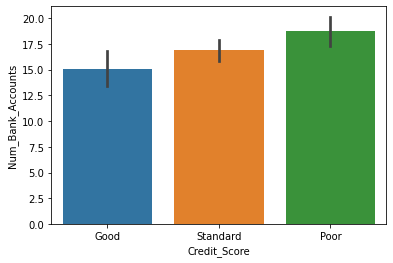

In [225]:
sns.barplot(x='Credit_Score', y="Num_Bank_Accounts", data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Num_Credit_Card'>

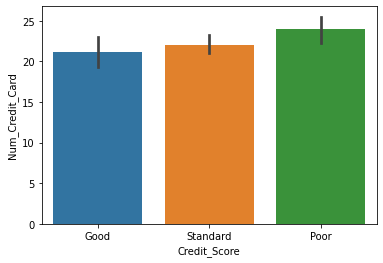

In [226]:
sns.barplot(x='Credit_Score', y="Num_Credit_Card", data=df)


<AxesSubplot:xlabel='Credit_Score', ylabel='Interest_Rate'>

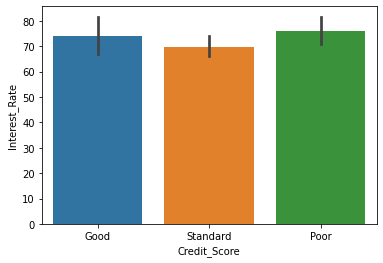

In [227]:
#not suitable feature
sns.barplot(x='Credit_Score', y="Interest_Rate", data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Delay_from_due_date'>

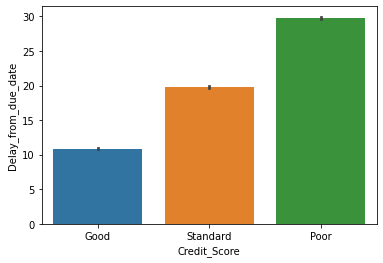

In [228]:
sns.barplot(x='Credit_Score', y="Delay_from_due_date", data=df)

In [229]:
df.drop(['Credit_Mix', 'Payment_Behaviour','Type_of_Loan','Interest_Rate' ],axis=1, inplace=True)
df.drop([ ],axis=1, inplace=True)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      100000 non-null  object 
 1   Occupation               100000 non-null  object 
 2   Annual_Income            100000 non-null  float64
 3   Monthly_Inhand_Salary    84998 non-null   float64
 4   Num_Bank_Accounts        100000 non-null  int64  
 5   Num_Credit_Card          100000 non-null  int64  
 6   Num_of_Loan              100000 non-null  float64
 7   Delay_from_due_date      100000 non-null  int64  
 8   Num_of_Delayed_Payment   92998 non-null   float64
 9   Num_Credit_Inquiries     98035 non-null   float64
 10  Outstanding_Debt         100000 non-null  float64
 11  Credit_History_Age       90970 non-null   object 
 12  Payment_of_Min_Amount    100000 non-null  object 
 13  Total_EMI_per_month      100000 non-null  float64
 14  Amoun

In [231]:
#Taking Age from Credit History date column and filling missing values
df['Credit_History_Age']=df['Credit_History_Age'].str.split(pat=' Years', expand=True)
df['Credit_History_Age']=df['Credit_History_Age'].astype('float')
df['Credit_History_Age']=df['Credit_History_Age'].fillna(df['Num_of_Delayed_Payment'].median())

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

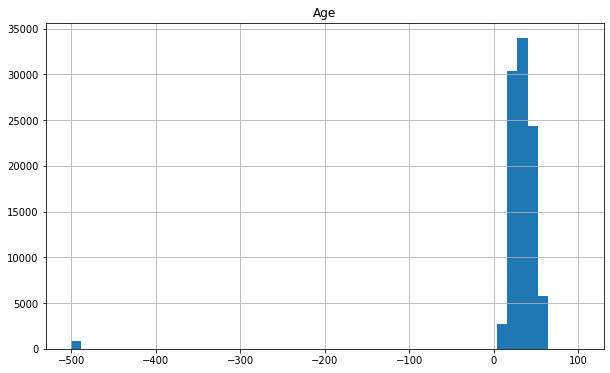

In [232]:
# Exploring Age column
df['Age'] = df['Age'].str.strip('_')
df['Age']=df['Age'].astype('float')
df.hist('Age', bins=50,range=[-500, 100], figsize=(10,6))
#We have some wrong data in Age column, let's fix it
 

In [233]:
#Replace any age value less than 18 or more than 100 for the median
df['Age'] = df['Age'].apply(lambda x: df['Age'].median() if x <= 18 or x >= 100 else x)

In [234]:
#Num of delay payments filling missing values
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())
df['Num_of_Delayed_Payment']

0         7.0
1        14.0
2         7.0
3         4.0
4        14.0
         ... 
99995     7.0
99996     7.0
99997     6.0
99998    14.0
99999     6.0
Name: Num_of_Delayed_Payment, Length: 100000, dtype: float64

In [235]:
#Monthly Salary filling missing values
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())
df['Monthly_Inhand_Salary']
#filling missing values
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median())
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median())
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].median())


In [236]:
#Now all the features are ready. I will create some dummies variaboles for the categorical features:
dummies1 = pd.get_dummies(df.Occupation, drop_first=True)

dummies2= pd.get_dummies(df.Payment_of_Min_Amount, drop_first=True)
dummies2

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
99995,1,0
99996,1,0
99997,1,0
99998,1,0


In [237]:
merged_df = pd.concat([df,dummies1,dummies2], axis ='columns')
merged_df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,...,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,_______,No,Yes
0,23.0,Scientist,19114.12,1824.843333,3,4,4.0,3,7.0,4.0,...,0,0,0,0,1,0,0,0,1,0
1,23.0,Scientist,19114.12,3093.745000,3,4,4.0,-1,14.0,4.0,...,0,0,0,0,1,0,0,0,1,0
2,33.0,Scientist,19114.12,3093.745000,3,4,4.0,3,7.0,4.0,...,0,0,0,0,1,0,0,0,1,0
3,23.0,Scientist,19114.12,3093.745000,3,4,4.0,5,4.0,4.0,...,0,0,0,0,1,0,0,0,1,0
4,23.0,Scientist,19114.12,1824.843333,3,4,4.0,6,14.0,4.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,4,6,2.0,23,7.0,3.0,...,0,1,0,0,0,0,0,0,1,0
99996,25.0,Mechanic,39628.99,3359.415833,4,6,2.0,18,7.0,3.0,...,0,1,0,0,0,0,0,0,1,0
99997,25.0,Mechanic,39628.99,3359.415833,4,6,2.0,27,6.0,3.0,...,0,1,0,0,0,0,0,0,1,0
99998,25.0,Mechanic,39628.99,3359.415833,4,6,2.0,20,14.0,3.0,...,0,1,0,0,0,0,0,0,1,0


In [238]:
merged_df.drop(['Occupation', 'Payment_of_Min_Amount'],axis=1, inplace= True)
merged_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,...,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,_______,No,Yes
0,23.0,19114.12,1824.843333,3,4,4.0,3,7.0,4.0,809.98,...,0,0,0,0,1,0,0,0,1,0
1,23.0,19114.12,3093.745000,3,4,4.0,-1,14.0,4.0,809.98,...,0,0,0,0,1,0,0,0,1,0
2,33.0,19114.12,3093.745000,3,4,4.0,3,7.0,4.0,809.98,...,0,0,0,0,1,0,0,0,1,0
3,23.0,19114.12,3093.745000,3,4,4.0,5,4.0,4.0,809.98,...,0,0,0,0,1,0,0,0,1,0
4,23.0,19114.12,1824.843333,3,4,4.0,6,14.0,4.0,809.98,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4,6,2.0,23,7.0,3.0,502.38,...,0,1,0,0,0,0,0,0,1,0
99996,25.0,39628.99,3359.415833,4,6,2.0,18,7.0,3.0,502.38,...,0,1,0,0,0,0,0,0,1,0
99997,25.0,39628.99,3359.415833,4,6,2.0,27,6.0,3.0,502.38,...,0,1,0,0,0,0,0,0,1,0
99998,25.0,39628.99,3359.415833,4,6,2.0,20,14.0,3.0,502.38,...,0,1,0,0,0,0,0,0,1,0


In [239]:
merged_df.to_csv(path_or_buf= r'C:\Users\Juan\Desktop\Data Science\Projects\Project_3_CreditCard\Data\df_clean.csv')